# UCI Machine Learning Repository Adult dataset Analysis
### 2018-1학기 고려대학교 김현철 교수님 인공지능 기말과제
#### 2018.06.08 2013130625 조성표

# Data Preprocessing
**분석에 사용할 자료로는 UCI Machine Learning Repository의 Adult Dataset(http://archive.ics.uci.edu/ml/datasets/Adult) 을 선정했습니다. 이 자료는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋입니다. 이 adult 데이터셋을 사용하면, 여러가지 특성(attributes)를 분석하여 수입이 50,000을 초과하는지, 혹은 그 이하일지를 예측할 수 있습니다.** 

다음은 데이터셋의 특성attribute입니다.

1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. label: >50K, <=50K.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read Data from Adult dataset, and add name of columns
# There are missing values represented as '?', so treat '?' as NaN
df = pd.read_csv('adult.data', header=None, sep=', ', engine='python', na_values='?')
df.columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
              "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
              "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
display(df.head(15))
print(df.shape)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


(32561, 15)


이 데이터셋은 32561개의 instances와 15개의 attributes로 이루어져 있는 것을 알 수 있습니다.
그런데 이 데이터셋에는 두 가지 특징이 있습니다.

1. 많은 특성들이 연속형(numerical) 특성이 아닌, **범주형 특성(categorical attribute)** 입니다. 이 특성들을 제외하고 연속형 특성들에만 분류 알고리즘을 적용할 수는 없기 때문에, 범주형 특성들을 다른 방식으로 표현해야 합니다.

2. '?'와 같은 missing value가 존재합니다. 그래서 위의 코드에서 read_csv로 데이터를 읽을 때 na_values='?'를 사용해 '?'를 NaN으로 인식하도록 했습니다.

따라서 범주형 특성을 숫자로 된 이산적인 특성으로 바꾸고, NaN값을 가지는 데이터를 삭제하거나 적절한 값을 impute해야 합니다.

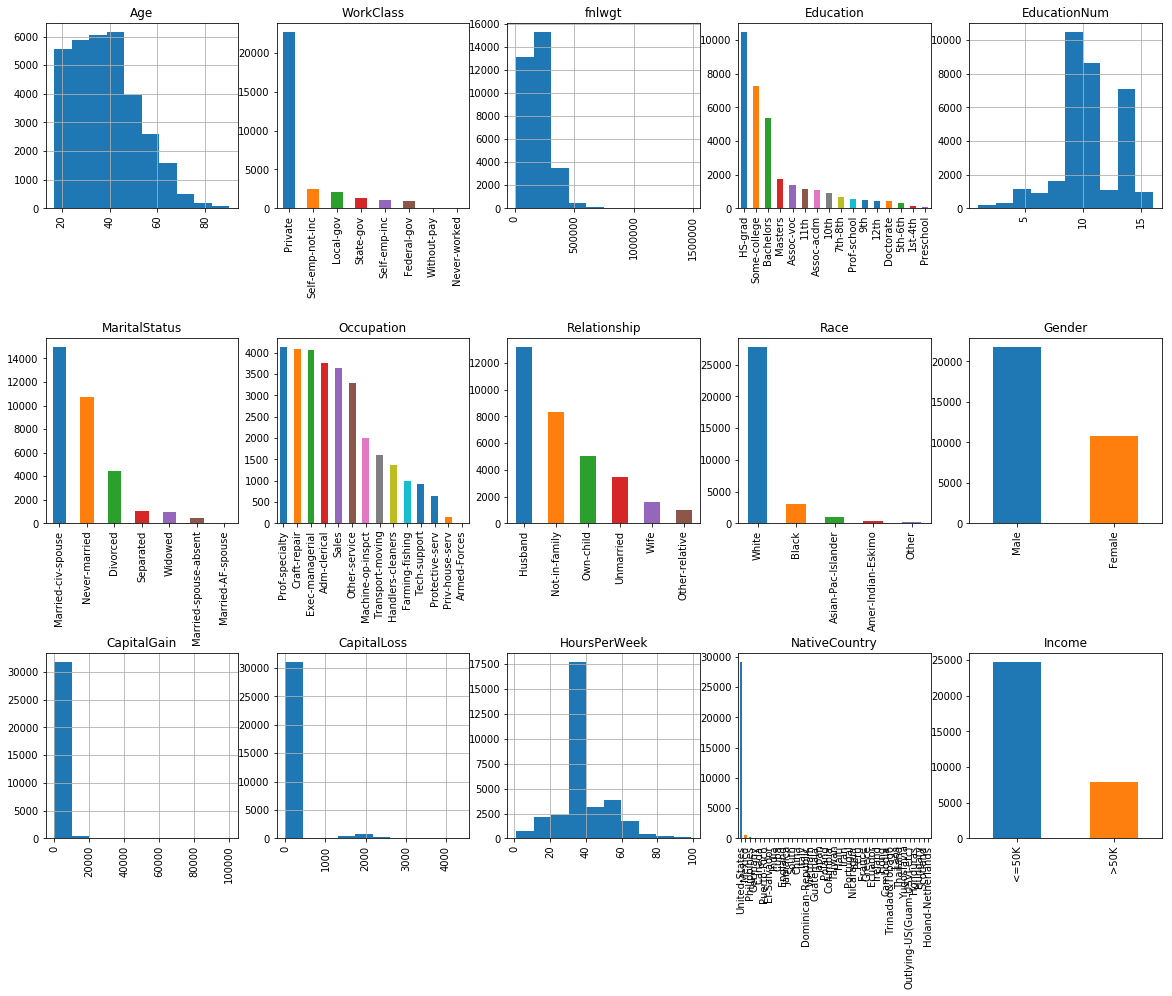

In [3]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = df.shape[1] / cols
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

위 도표에서는 각 attribute의 data마다 어떤 특징과 분포를 갖고 있는지 알 수 있습니다. 위 도표를 보면 현재 dataset이 주로 미국 출신의 백인 남성에 편중되어 있다는 것을 알 수 있습니다.

우선 데이터 처리를 위해 '?'로 표시되던 missing value들이 얼마나 존재하는지 살펴보고, 그 결과에 따라 missing value들을 적절히 impute할지 삭제할지 판단하겠습니다.

In [4]:
display(df.isnull().sum())

Age                 0
WorkClass        1836
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     583
Income              0
dtype: int64

WorkClass, Occupation, NativeCountry 세 attribute에서 missing value들이 꽤 많이 존재하는 것을 알 수 있습니다. 만약 갖고 있는 데이터 크기가 크지 않다면, 이러한 missing value들을 지우는 것은 가치있는 정보를 삭제하는 것과 같습니다. 그래서 삭제하는 대신, 다른 훈련 데이터로부터 missing value들을 추측하여 impute하도록 하겠습니다. imputation 기법 중에는 'most frequent imputation'을 사용하겠습니다.

**adult 데이터의 범주형 데이터를 기계학습에서 처리하기 위해서는, 범주형 데이터를 숫자로 바꾸는 작업이 필요합니다. 여기에서는 Scikit-learn의 LabelEncoder와 OneHotEncoder 클래스를 이용한 One-Hot-Encoding을 사용하겠습니다.** 또한 예측과는 상관없는 특성으로 지적된 fnlwgt([Chris Shoemaker, www.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt/ accessed 10 March 2007])를 삭제하도록 하겠습니다. 

In [5]:
from sklearn import preprocessing

# Drop fnlwgt' from columns and change target names
adult = df.drop(df.columns[2], axis=1)
adult.Income = adult.Income.map({'>50K':1, '<=50K':0})

# fill all NaNs with the most frequent value from one column
adult_impute = adult.apply(lambda x:x.fillna(x.value_counts().index[0]))
print('Sum of missing values:\n', adult_impute.isnull().sum())
print('\nsize of adult dataset after imputation: ', adult_impute.shape)

label_encoder = preprocessing.LabelEncoder()
adult_impute = adult_impute.apply(label_encoder.fit_transform)
display(adult_impute.head())

Sum of missing values:
 Age              0
WorkClass        0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

size of adult dataset after imputation:  (32561, 14)


,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,22,6,9,12,4,0,1,4,1,25,0,39,38,0
1,33,5,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,9,12,2,9,5,2,0,0,0,39,4,0


### Visualize Correlations between features

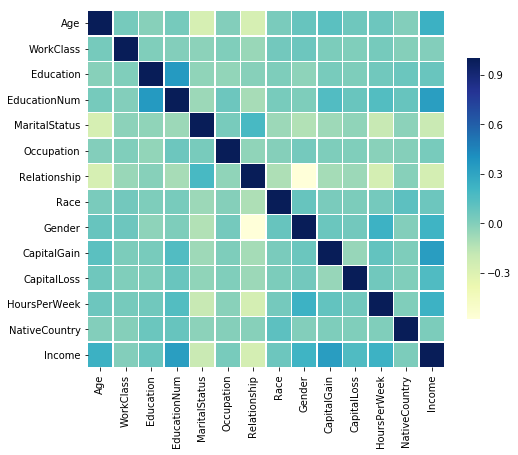

In [6]:
corr = adult_impute.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corr,square=True, cmap="YlGnBu", xticklabels=True, yticklabels=True, linewidths=.6, cbar_kws={"shrink": .6}, ax=ax)

특성들 간의 상관지수를 Seaborn 라이브러리를 이용해 표현해 보았습니다. 그 중에서 눈에 띄는 것은 Education과 EducationNum인데, 실제 이를 비교해보면 EducationNum은 개인의 학력(Education)을 숫자로 표현한 수치라는 것을 알 수 있습니다.

## One-Hot Encoding
**LabelEncoder의 결과값을 그대로 분류기에 넣는다면 문제가 발생합니다.** 예를 들어 'WorkClass'의 class는 'Private', 'State-gov'와 같은, 우열을 가릴 수 없는 동등한 범주입니다. 그러나 이를 숫자로 바꾸면 분류기는 한 class가 다른 class보다 크다고 인식하므로 분류 상의 정확도가 떨어지게 됩니다. 그래서 One-Hot Encoding 과정이 필요한 것입니다. One-Hot-Encoding은 범주형 변수를 '가변수(dummy variable)'라는 0과 1의 값을 가진 새로운 특성을 만들어내어 이러한 오류를 방지합니다.

사실 LabelEncoder와 OneHotEncoder를 이용하지 않고도 pandas의 get_dummies를 이용하면 categorical vaules를 손쉽게 인코딩 할 수 있는데, 여기서는 연습을 위해 일부러 전자를 택했습니다.

In [7]:
impute_data = adult_impute.values

# select categorical features
categories = ['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender', 'NativeCountry']
impute_data = adult_impute.values

# find index of categorical features
categories_idx = []
for str in categories:
    categories_idx.append(adult_impute.columns.tolist().index(str))

OH_encoder = preprocessing.OneHotEncoder(categorical_features = categories_idx, sparse=False)
adult_ohe = OH_encoder.fit_transform(impute_data)
adult_ohe = pd.DataFrame(adult_ohe)

# Name columns of adult_ohe using 'get_dummies'
dummy = pd.get_dummies(df)
dummy = dummy.drop(dummy.columns[[1, 105]], axis='columns')
dummy.rename(columns={'Income_>50K': 'Income'}, inplace=True)
adult_ohe.columns = dummy.columns

display(adult_ohe.head())

,Age,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,...,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia,Income
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,22.0,12.0,25.0,0.0,39.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,33.0,12.0,0.0,0.0,12.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,21.0,8.0,0.0,0.0,39.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,36.0,6.0,0.0,0.0,39.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,12.0,0.0,0.0,39.0,0.0


### Visualize Correlations between bianry features

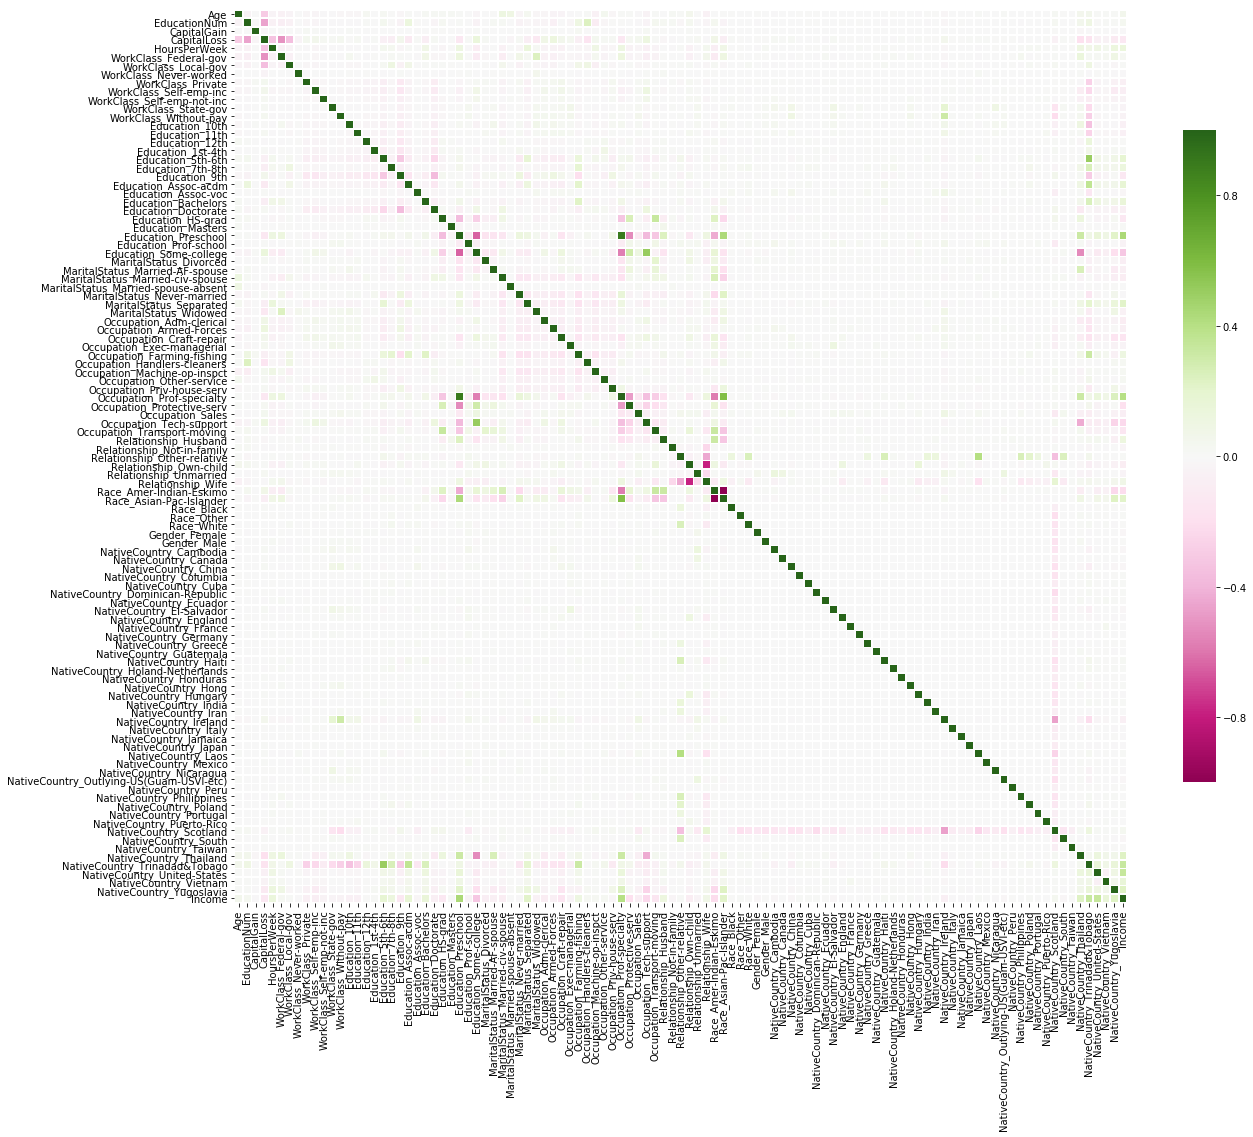

In [8]:
plt.subplots(figsize=(20,20))

sns.heatmap(adult_ohe.corr(), cmap="PiYG", square=True, xticklabels=True, yticklabels=True, 
            linewidths=.6, cbar_kws={"shrink": .6})
plt.show()

# Classify data using ML techniques

데이터에 대한 분석을 끝냈으니, 이제 본격적으로 데이터에 기계학습을 적용해 보도록 하겠습니다.

In [9]:
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.linear_model import Lasso                 #LASSO Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import GradientBoostingClassifier#Gradient Boosting Classifier
from sklearn.svm import SVC                            #SVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics

In [10]:
# Sample 10000 datas because the data is too big to compute
adult_ohe = adult_ohe.sample(n=10000, random_state=42)

X = adult_ohe.iloc[:, adult_ohe.columns != 'Income']
y = adult_ohe.iloc[:, adult_ohe.columns == 'Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean y values to avoid future warning messages
# for 'ravel()', refer to 'https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html'.
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

### 1. KNN Classifier

In [10]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn_grid = GridSearchCV(knn, param_grid, cv=5)
knn_grid.fit(X_train, y_train)

print('======== K-Neighbors Classifier Result ========')
print('Test set score: {:.3f}'.format(knn_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(knn_grid.best_params_))
print('Best CV score: {:.3f}'.format(knn_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, knn_grid.predict(X_test)))

======== K-Neighbors Classifier Result ========
Test set score: 0.824
Best Parameter: {'n_neighbors': 10}
Best CV score: 0.832
<<Classification Result>>
              precision    recall  f1-score   support

        0.0       0.85      0.93      0.89      1512
        1.0       0.70      0.49      0.57       488

avg / total       0.81      0.82      0.81      2000



### 2. Logistic Regression

In [11]:
#----------------Logistic Regression
lr = LogisticRegression()
param_lr = {'C': [0.1, 0.3, 1, 3, 10]}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
lr_grid = GridSearchCV(lr, param_lr, cv=5, return_train_score=True)
lr_grid.fit(X_train, y_train)

print('======== Logistic Regression Classifier Result ========')
print('Test set score: {:.3f}'.format(lr_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(lr_grid.best_params_))
print('Best CV score: {:.3f}'.format(lr_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, lr_grid.predict(X_test)))

======== Logistic Regression Classifier Result ========
Test set score: 0.838
Best Parameter: {'C': 0.3}
Best CV score: 0.849
<<Classification Result>>
              precision    recall  f1-score   support

        0.0       0.87      0.92      0.90      1512
        1.0       0.70      0.58      0.64       488

avg / total       0.83      0.84      0.83      2000



In [86]:
'''
# Show which features are contributing the most
lr2= LogisticRegression(C=3)
lr2.fit(X_train, y_train)
coefs = pd.Series(lr2.coef_[0], index=X_train.columns)

plt.figure(figsize=(20,10))
coefs.sort_values().plot(kind="bar", color='green')
plt.show()
'''

'\n# Show which features are contributing the most\nlr2= LogisticRegression(C=3)\nlr2.fit(X_train, y_train)\ncoefs = pd.Series(lr2.coef_[0], index=X_train.columns)\n\nplt.figure(figsize=(20,10))\ncoefs.sort_values().plot(kind="bar", color=\'green\')\nplt.show()\n'

### 3. LASSO Regression
LASSO는 Ridge회귀와 달리 regularization 방법으로 파라미터의 절대값을 더하는 방법을 씁니다. LASSO를 시험적으로 적용해보았는데, 41%라는 낮은 accuracy가 나왔습니다. 추후 잘못된 곳이 없는지 다시 검사하여 예측률을 높이겠습니다.

In [12]:
#----------------LASSO
ls = Lasso(max_iter=10000)
param_ls = {'alpha': [0.001, 0.003, 0.01, 0.03]}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
ls_grid = GridSearchCV(ls, param_ls, cv=5)
ls_grid.fit(X_train, y_train)

print('======== LASSO Regression Classifier Result ========')
print('Test set score: {:.3f}'.format(ls_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(ls_grid.best_params_))
print('Best CV score: {:.3f}'.format(ls_grid.best_score_))

======== LASSO Regression Classifier Result ========
Test set score: 0.381
Best Parameter: {'alpha': 0.003}
Best CV score: 0.386


### 4. Gradient Boosting Regression Tree
그래디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 방법입니다. 이름은 회귀이지만 회귀와 분류 모두에 사용할 수 있습니다. 이전 트리의 오차를 보완하는 'Boosting'기법과 강력한 사전 가지치기가 쓰여 메모리를 적게 사용하고 예측도 빠릅니다.

In [13]:
gbrt = GradientBoostingClassifier(random_state=0)
param_gbrt = {'learning_rate': [0.01, 0.03], 'n_estimators': [100, 1000],
              'max_depth': [3, 4]}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
gbrt_grid = GridSearchCV(gbrt, param_gbrt, cv=5)
gbrt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.03], 'n_estimators': [100, 1000], 'max_depth': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
print('======== Gradient Boosting Regression Tree Result ========')
print('Test set score: {:.3f}'.format(gbrt_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(gbrt_grid.best_params_))
print('Best CV score: {:.3f}'.format(gbrt_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, lr_grid.predict(X_test)))

======== Gradient Boosting Regression Tree Result ========
Test set score: 0.863
Best Parameter: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000}
Best CV score: 0.870
<<Classification Result>>
              precision    recall  f1-score   support

        0.0       0.87      0.92      0.90      1512
        1.0       0.70      0.58      0.64       488

avg / total       0.83      0.84      0.83      2000



,NativeCountry_Thailand,NativeCountry_Yugoslavia,NativeCountry_United-States,NativeCountry_Trinadad&Tobago,NativeCountry_Vietnam,Education_Preschool,Relationship_Husband,HoursPerWeek,MaritalStatus_Separated,Occupation_Farming-fishing,...,CapitalGain,WorkClass_Never-worked,NativeCountry_Jamaica,NativeCountry_Puerto-Rico,NativeCountry_China,NativeCountry_Outlying-US(Guam-USVI-etc),NativeCountry_Germany,NativeCountry_Honduras,NativeCountry_Hungary,NativeCountry_France
0,0.160912,0.118092,0.088039,0.074689,0.058716,0.042157,0.021821,0.018585,0.017475,0.01498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


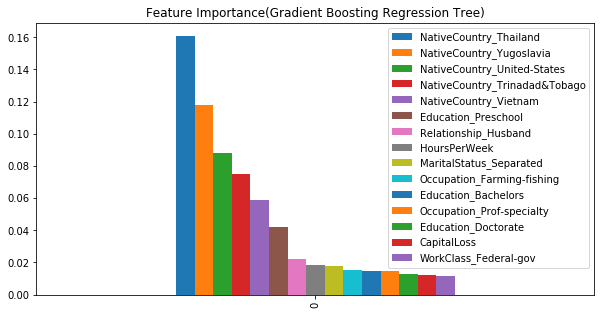

In [18]:
# Feature Importance of Gradient Boosting Regression Tree
dt2 = GradientBoostingClassifier(learning_rate=0.03, max_depth=4, n_estimators=1000)
dt2.fit(X_train, y_train)

# Convert Feature Importance array to 1-row DataFrame, and name&sort the columns
GBT_FI = pd.DataFrame(dt2.feature_importances_.reshape(1,-1))
GBT_FI.columns = X.columns
GBT_FI = GBT_FI.sort_values(by=0, ascending=False, axis=1)
display(GBT_FI)

# Show the 10 most important features by Decision Tree 
GBT_FI = GBT_FI.drop(GBT_FI.columns[15:], axis=1)
gbrt_fig = GBT_FI.plot(kind='bar', title='Feature Importance(Gradient Boosting Regression Tree)', legend=True, figsize=(10,5))
#dtfig.set_xlabel('Feature')
#dtfig.set_ylabel('Feature Importance')

### 5. Decsion Tree

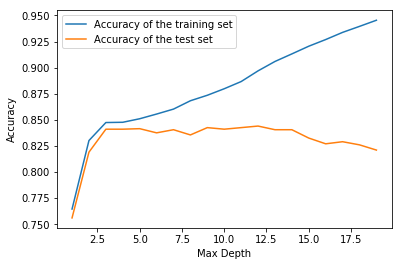

In [21]:
training_accuracy = list()
test_accuracy = list()

max_dep = range(1,20)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=42)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [22]:
# Select Best parameter using GridSearchCV and 5-fold Cross Validation
dt = DecisionTreeClassifier(random_state=42)
param_dt = {'max_depth': [3, 4, 5, 6, 7, 8], 'max_features': ['auto', 'sqrt', 'log2', None]}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
dt_grid = GridSearchCV(dt, param_dt, cv=5, return_train_score=True)
dt_grid.fit(X_train, y_train)

print('======== Decision Tree Result ========')
print('Test set score: {:.3f}'.format(dt_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(dt_grid.best_params_))
print('Best CV score: {:.3f}'.format(dt_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, dt_grid.predict(X_test)))

======== Decision Tree Result ========
Test set score: 0.836
Best Parameter: {'max_depth': 8, 'max_features': None}
Best CV score: 0.849
<<Classification Result>>
              precision    recall  f1-score   support

        0.0       0.89      0.90      0.89      1512
        1.0       0.67      0.65      0.66       488

avg / total       0.83      0.84      0.83      2000



,Education_Preschool,NativeCountry_United-States,NativeCountry_Trinadad&Tobago,Race_Asian-Pac-Islander,NativeCountry_Yugoslavia,NativeCountry_Thailand,Occupation_Protective-serv,Education_9th,MaritalStatus_Separated,Education_5th-6th,...,Gender_Male,NativeCountry_Cambodia,NativeCountry_Canada,NativeCountry_China,NativeCountry_Columbia,NativeCountry_Cuba,WorkClass_State-gov,Occupation_Adm-clerical,NativeCountry_El-Salvador,Relationship_Other-relative
0,0.172055,0.157492,0.149349,0.12523,0.110387,0.083085,0.055953,0.043458,0.017282,0.013231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


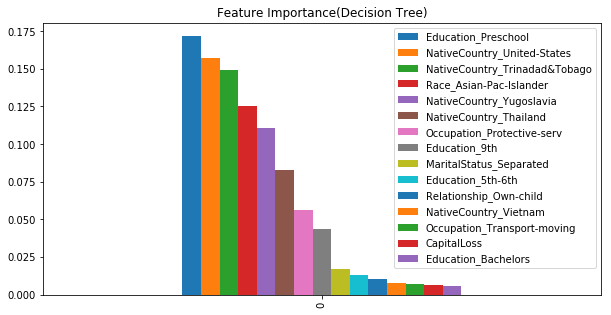

In [20]:
# Feature Importance of Decision Tree
dt2 = DecisionTreeClassifier(max_depth=7, max_features='auto', random_state=42)
dt2.fit(X_train, y_train)

# Convert Feature Importance array to 1-row DataFrame, and name&sort the columns
TreeFI = pd.DataFrame(dt2.feature_importances_.reshape(1,-1))
TreeFI.columns = X.columns
TreeFI = TreeFI.sort_values(by=0, ascending=False, axis=1)
display(TreeFI)

# Show the 10 most important features by Decision Tree 
TreeFI = TreeFI.drop(TreeFI.columns[15:], axis=1)
dtfig = TreeFI.plot(kind='bar', title='Feature Importance(Decision Tree)', legend=True, figsize=(10,5))
#dtfig.set_xlabel('Feature')
#dtfig.set_ylabel('Feature Importance')

### 6. SVM

In [87]:
svm = SVC()
param_svm = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10], 'decision_function_shape': ['ovo', 'ovr']}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
# We'll use scaled data like MLP to prevent overfitting.
svm_grid = GridSearchCV(svm, param_svm, cv=5)
svm_grid.fit(X_train, y_train)

print('======== Support Vector Machine Result ========')
print('Test set score: {:.3f}'.format(svm_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(svm_grid.best_params_))
print('Best CV score: {:.3f}'.format(svm_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, svm_grid.predict(X_test)))

======== Support Vector Machine Result ========
Test set score: 0.840
Best Parameter: {'C': 1, 'decision_function_shape': 'ovo'}
Best CV score: 0.841
<<Classification Result>>
              precision    recall  f1-score   support

        0.0       0.86      0.94      0.90      1501
        1.0       0.75      0.54      0.63       499

avg / total       0.83      0.84      0.83      2000



### 7. Baseline: ZeroR
ZeroR 알고리즘은 직접 구현했습니다. ZeroR은 정말 간단한 알고리즘이지만, 75.6%라는 정확도가 나오는 것을 확인할 수 있었습니다. 이는 현재 갖고 있는 데이터가 0(50K 이하)에 편중되어 있어 무조건 0으로 예측하더라도 대부분 맞기 때문입니다.

In [49]:
import collections

# Count the number of frequency for each y values, and choose the most frequent class
def ZeroR(y_train, y_test):
    num_pred = []
    for i in range(len(y_train)):
        num_pred.append((y_train[i]))
    counter=collections.Counter(num_pred)
    return counter
    y_pred = np.array([next(iter(counter)) for i in range(len(y_test))])
    return y_pred

accuracy = metrics.accuracy_score(y_test, y_pred)
print("The Test accuracy of ZeroR is: {:.3f}".format(accuracy))

The Test accuracy of ZeroR is: 0.756


###  8. Baseline: OneR
OneR은 파이썬으로 제대로 구현되어 있는 것이 없고, numerical value들을 범주형 특성으로 바꾸어주어야 하기 때문에 어렵습니다. 따라서 R의 OneR 라이브러리를 사용했습니다. R코드는 첨부되어 있는 'OneR Algorithm'(R로 작성)이라는 파일을 확인하시면 됩니다. OneR 알고리즘은 baseline이고 룰이 간단하지만, 79.91%라는 괜찮은 accuracy 수치를 보였습니다.

In [ ]:
'''
Call:
OneR.data.frame(x = df.train, verbose = T)

Rules:
If Cap_Gain = (-100,3.97e+03]  then Income =  <=50K
If Cap_Gain = (3.97e+03,1e+05] then Income =  >50K

Accuracy:
20815 of 26048 instances classified correctly (79.91%)

Contingency table:
        Cap_Gain
Income   (-100,3.97e+03] (3.97e+03,1e+05]   Sum
   <=50K         * 19522              233 19755
   >50K             5000           * 1293  6293
  Sum              24522             1526 26048
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 3242.4, df = 1, p-value < 2.2e-16
'''